<a href="https://colab.research.google.com/github/mrizkyfauzi24/finalproject/blob/main/Finproven_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Kelompok 7 : E-Commerce Shipping Data

*Data set yang digunakan merupakan dataset dari sebuah perusahaan e-commerce internasional yang ingin mengetahui key insight dari database konsumen. *

Content . 
Dataset ini terdari dari 10999 observations dari 12 variable.
Dataset ini memiliki informasi sebagai berikut:

ID : Nomor ID Pelanggan.

Warehouse block : Perusahaan memiliki Gudang besar yang terbagi menjadi blok-blok seperti A,B,C,D,E.

Mode of shipment :Perusahaan mengirimkan produk dengan berbagai cara seperti Ship, Flight, dan Road.

Customer care calls: Jumlah panggilan yang dilakukan dari penyelidikan untuk penyelidikan kiriman.

Customer rating: Perusahaan telah menilai dari setiap pelanggan. 1 adalah yang terendah (Terburuk), 5 adalah yang tertinggi (Terbaik).

Cost of the product: Biaya Produk dalam Dolar AS.

prior purchase: Jumlah Pembelian Sebelumnya.

product importance: Perusahaan telah mengkategorikan produk dalam berbagai parameter seperti rendah, sedang, tinggi.

gender: Pria dan Wanita.

Discount offered: Diskon yang ditawarkan untuk produk tertentu itu.

Weight in gms: Ini adalah berat dalam gram.

reached on time: Ini adalah variabel target, di mana 1 Menunjukkan bahwa produk TIDAK tercapai tepat waktu dan 0 menunjukkan telah tercapai tepat waktu.


Load dataset dan lihat isi dari kolom

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
sns.color_palette('summer')


[(0.1411764705882353, 0.5705882352941176, 0.4),
 (0.28627450980392155, 0.6431372549019607, 0.4),
 (0.42745098039215684, 0.7137254901960784, 0.4),
 (0.5725490196078431, 0.7862745098039216, 0.4),
 (0.7137254901960784, 0.8568627450980393, 0.4),
 (0.8588235294117647, 0.9294117647058824, 0.4)]

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Shipment_Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
## melihat apakah ada kolom kosong atau tidak
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
df.shape #melihat jumlah baris dan jumlah kolom dari dataset

(10999, 12)

In [ ]:
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']


In [ ]:
# melihat gambaran umum statistik deskriptif dari data
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# Descriptive Statistic

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
- Semua tipe data sudah sesuai <br>
<br>

B.Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
- tidak ada kolom yang memiliki nilai kosong<br>
<br>

C.Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)<br>

- kolom prior_purchase memiliki keanehan karena nilai Q1 dan Q2 memiliki nilai yang sama jadi memungkinkan kolom tersebut ada nilai yang mendominasi.<br>
<br>
- kolom Discount_offered memiliki keanehan karena mean > median jadi memungkinkan kolom tersebut right skewed dan memiliki outliers.<br>
<br>
- kolom Weight_in_gms memiliki keanehan karena nilai mean < median jadi memungkinkan kolom tersebut memiliki left skew dan memiliki outliers.

# Univariate Analysis pada kolom kategorikal

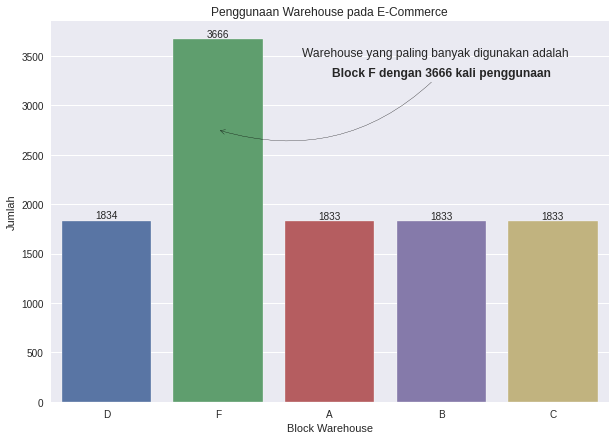

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(data=df, x='Warehouse_block')
plt.title('Penggunaan Warehouse pada E-Commerce')
plt.xlabel('Block Warehouse')
plt.ylabel('Jumlah')
plt.annotate('Warehouse yang paling banyak digunakan adalah', 
            xy=(1.75, 3500),fontsize=12)
plt.annotate('Block F dengan 3666 kali penggunaan',xy=(1, 2750), xytext=(3, 3300), arrowprops=dict(color='black',arrowstyle="->",connectionstyle="arc3,rad=-.3"),fontsize=12, fontweight='bold',ha='center')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()



<ipython-input-85-bd6a9b17ead5>:9: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('Kapal',xy=(0, 2750), xytext=(1.5, 3500), arrowprops=dict(color="black",facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=-.3"),fontsize=16, fontweight='bold',ha='center')


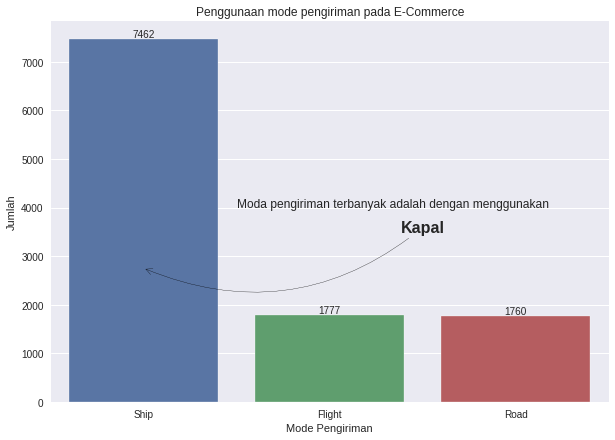

In [ ]:
plt.figure(figsize = (10,7))
df_grouped = df.groupby('Mode_of_Shipment')['ID'].nunique().reset_index(name='ID').sort_values(by='ID', ascending=False)
ax = sns.barplot(data=df_grouped, x='Mode_of_Shipment',y='ID')
plt.title('Penggunaan mode pengiriman pada E-Commerce')
plt.xlabel('Mode Pengiriman')
plt.ylabel('Jumlah')
plt.annotate('Moda pengiriman terbanyak adalah dengan menggunakan ', 
            xy=(0.5, 4000),fontsize=12)
plt.annotate('Kapal',xy=(0, 2750), xytext=(1.5, 3500), arrowprops=dict(color="black",facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=-.3"),fontsize=16, fontweight='bold',ha='center')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()



<ipython-input-86-86134e05c903>:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('Low',xy=(0, 2750), xytext=(1.5, 6000), arrowprops=dict(color="black",facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=0.3"),fontsize=12,ha='center',fontweight='bold')


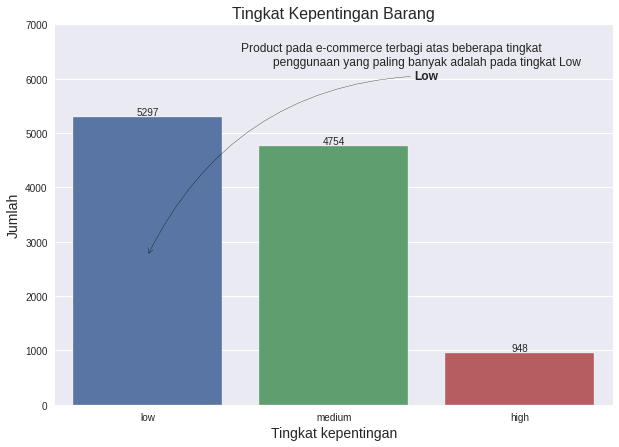

In [ ]:
plt.figure(figsize = (10,7))
df_grouped = df.groupby('Product_importance')['ID'].nunique().reset_index(name='ID').sort_values(by='ID', ascending=False)
ax = sns.barplot(data=df_grouped, x='Product_importance',y='ID')
plt.title('Tingkat Kepentingan Barang', fontsize=16)
plt.xlabel('Tingkat kepentingan', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.ylim(0,7000)
plt.annotate('Product pada e-commerce terbagi atas beberapa tingkat ', 
            xy=(0.5, 6500),fontsize=12,ha='left')
plt.annotate('penggunaan yang paling banyak adalah pada tingkat Low', xy=(1.5, 6250),ha='center',fontsize=12)
plt.annotate('Low',xy=(0, 2750), xytext=(1.5, 6000), arrowprops=dict(color="black",facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=0.3"),fontsize=12,ha='center',fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,)

plt.show()



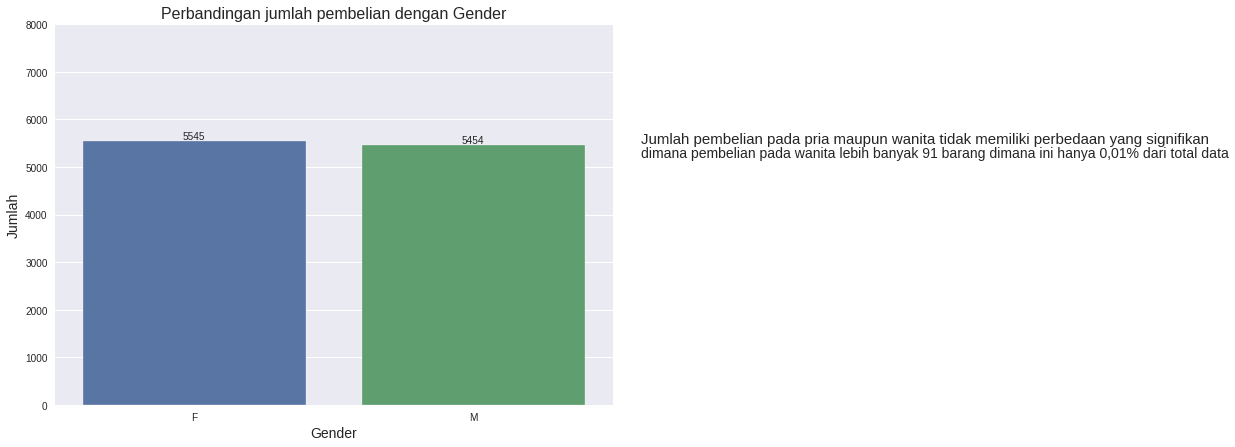

In [ ]:
plt.figure(figsize = (10,7))
df_grouped = df.groupby('Gender')['ID'].nunique().reset_index(name='ID').sort_values(by='ID', ascending=False)
ax = sns.barplot(data=df_grouped, x='Gender',y='ID')
plt.title('Perbandingan jumlah pembelian dengan Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.ylim(0,8000)
plt.text(s='Jumlah pembelian pada pria maupun wanita tidak memiliki perbedaan yang signifikan ', 
            x=1.6,y=5500,fontsize=15,ha='left')
plt.text(s='dimana pembelian pada wanita lebih banyak 91 barang dimana ini hanya 0,01% dari total data',
          x=1.6,y=5200,fontsize=14,ha='left')
         

for i in ax.containers:
    ax.bar_label(i,)

plt.show()



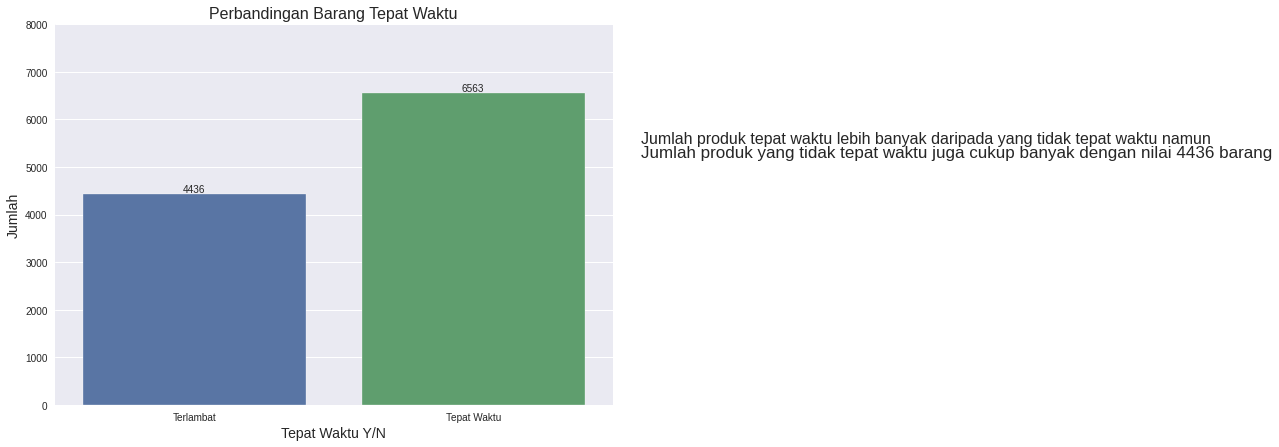

In [ ]:
plt.figure(figsize = (10,7))
df_grouped = df.groupby('Reached.on.Time_Y.N')['ID'].nunique().reset_index(name='ID').sort_values(by='ID', ascending=False)
ax = sns.barplot(data=df_grouped, x='Reached.on.Time_Y.N',y='ID')
plt.title('Perbandingan Barang Tepat Waktu', fontsize=16)
x = [0,1]
labels = ['Terlambat','Tepat Waktu']
plt.xticks(x, labels)
plt.xlabel('Tepat Waktu Y/N', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.ylim(0,8000)
plt.text(s='Jumlah produk tepat waktu lebih banyak daripada yang tidak tepat waktu namun', 
            x=1.6,y=5500,fontsize=16,ha='left')
plt.text(s='Jumlah produk yang tidak tepat waktu juga cukup banyak dengan nilai 4436 barang',
          x=1.6,y=5200,fontsize=17,ha='left')
         
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# Analisis Univariate Kolom Numerical

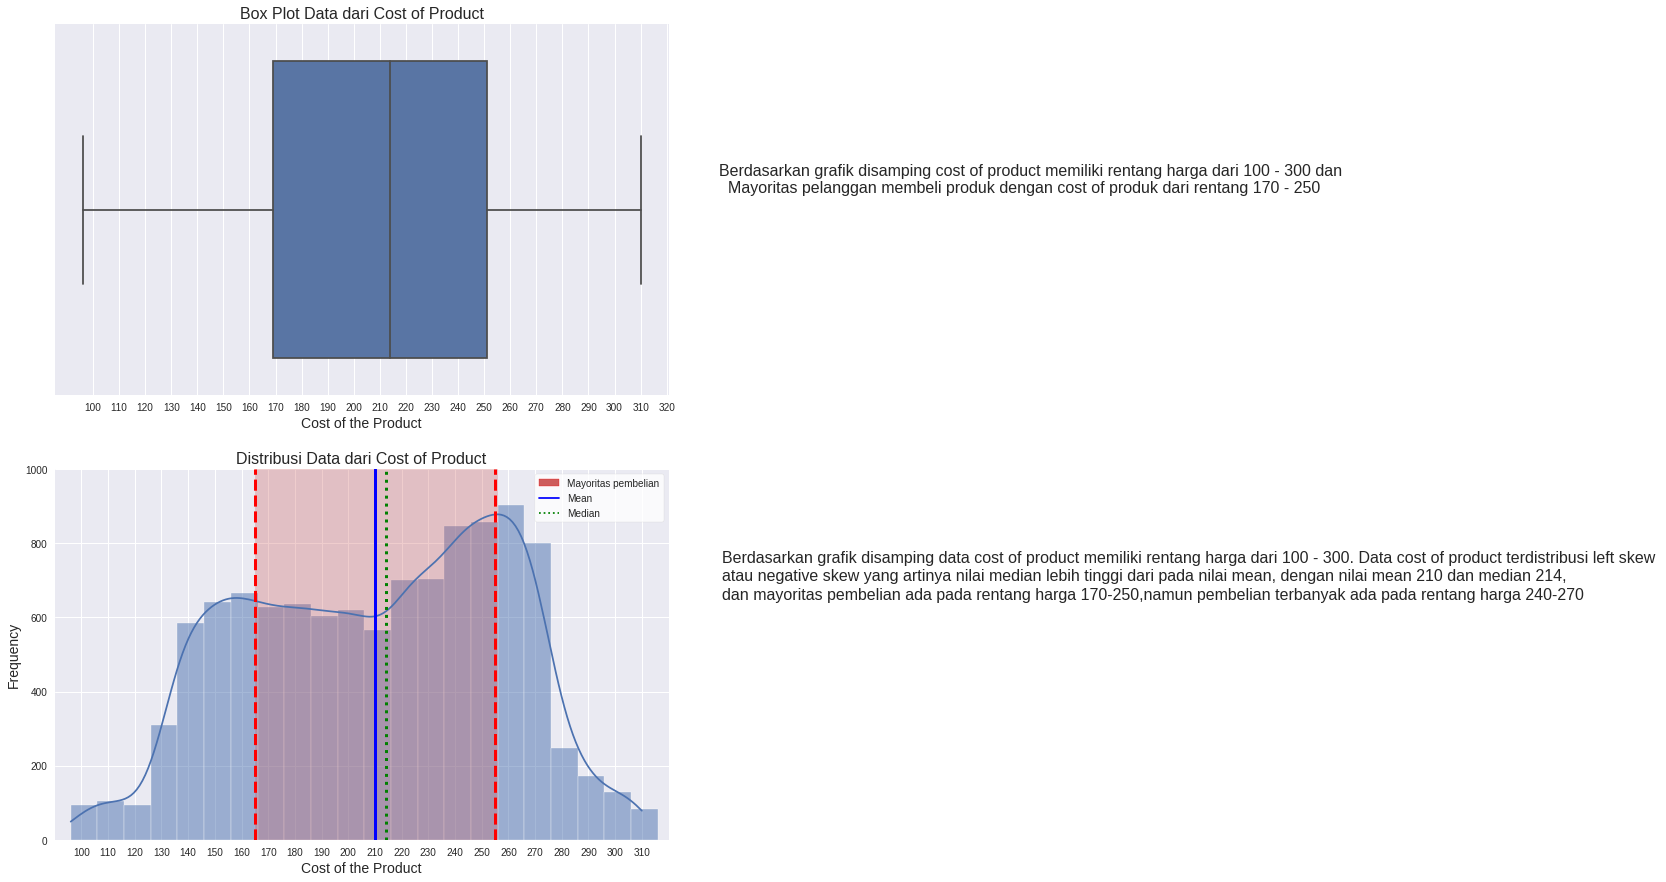

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Cost_of_the_Product')
ax[0].set_title('Box Plot Data dari Cost of Product',fontsize=16)
ax[0].set_xlabel('Cost of the Product',fontsize=14)
ax[0].text(x=340,y=0, s='Berdasarkan grafik disamping cost of product memiliki rentang harga dari 100 - 300 dan \n  Mayoritas pelanggan membeli produk dengan cost of produk dari rentang 170 - 250\n',
           fontsize=16)
ticks = np.arange(100, 330,10)
ax[0].set_xticks(ticks)
ax[0].set_xticklabels([round(x) for x in ticks])


sns.histplot(ax=ax[1],data=df,x="Cost_of_the_Product",kde=True,binwidth=10)
ax[1].set_title('Distribusi Data dari Cost of Product',fontsize=16)
ax[1].set_ylabel('Frequency',fontsize=14)
ax[1].set_xlabel('Cost of the Product',fontsize=14)
ax[1].set_xlim(90,320)
ticks = np.arange(100, 320,10)
ax[1].set_xticks(ticks)
ax[1].set_ylim(0,1000)
ax[1].stackplot(np.arange(165, 257), [[1000]], colors=('indianred',), alpha=0.3)
ax[1].axvline(x=165, color='red', linestyle='--', linewidth=3)
ax[1].axvline(x=255, color='red', linestyle='--', linewidth=3)
ax[1].axvline(x=np.mean(df['Cost_of_the_Product']), color='blue', linestyle='solid', linewidth=3)
ax[1].axvline(x=np.median(df['Cost_of_the_Product']), color='green', linestyle='dotted', linewidth=3)
ax[1].text(x=340,y=750, s='Berdasarkan grafik disamping data cost of product memiliki rentang harga dari 100 - 300. Data cost of product terdistribusi left skew ' ,fontsize=16)
ax[1].text(x=340,y= 700,s='atau negative skew yang artinya nilai median lebih tinggi dari pada nilai mean, dengan nilai mean 210 dan median 214, ' ,fontsize=16)
ax[1].text(x=340,y=650, s='dan mayoritas pembelian ada pada rentang harga 170-250,namun pembelian terbanyak ada pada rentang harga 240-270  ',fontsize=16)




legend_elements = [Patch(facecolor='indianred', edgecolor='r',
                         label='Mayoritas pembelian'),
                   Line2D([0], [0], ls='solid', color='blue', label='Mean',
                          markerfacecolor='g', markersize=15),
                   Line2D([0], [1], ls='dotted', color='green', label='Median',
                          markerfacecolor='g', markersize=15),]
ax[1].legend(handles=legend_elements, loc='upper right',frameon=True, facecolor='White')

plt.show()


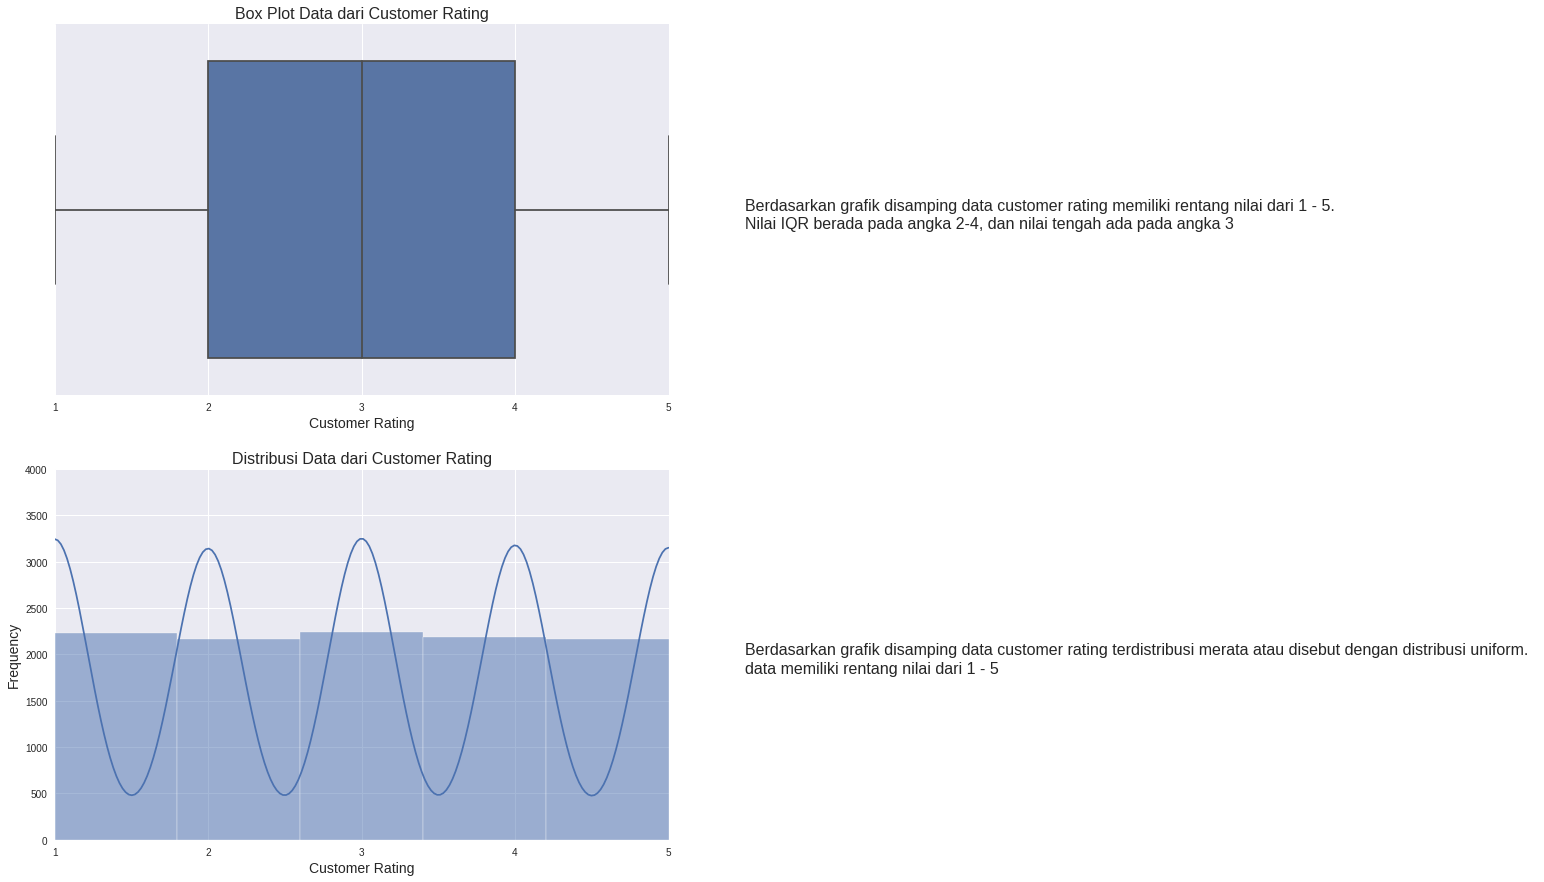

In [ ]:

fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Customer_rating')
ax[0].set_title('Box Plot Data dari Customer Rating', fontsize=16)
ax[0].set_xlabel('Customer Rating', fontsize=14)
ax[0].set_xlim(1,5)
ticks = np.arange(1, 6)
ax[0].set_xticks(ticks)
ax[0].text(x=5.5,y=0, s='Berdasarkan grafik disamping data customer rating memiliki rentang nilai dari 1 - 5. ' ,fontsize=16)
ax[0].text(x=5.5,y=0.05, s='Nilai IQR berada pada angka 2-4, dan nilai tengah ada pada angka 3',fontsize=16)




sns.histplot(ax=ax[1],data=df,x="Customer_rating",bins=5,kde=True)
ax[1].set_title('Distribusi Data dari Customer Rating', fontsize=16)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_ylim(0,4000)
ax[1].set_xlim(1,5)
ax[1].text(x=5.5,y=2000, s='Berdasarkan grafik disamping data customer rating terdistribusi merata atau disebut dengan distribusi uniform.  ' ,fontsize=16)
ax[1].text(x=5.5,y=1800, s='data memiliki rentang nilai dari 1 - 5',fontsize=16)


ticks = np.arange(1, 6)
ax[1].set_xticks(ticks)
ax[1].set_xticklabels([round(x) for x in ticks])
ax[1].set_xlabel('Customer Rating',fontsize=14)


plt.show()

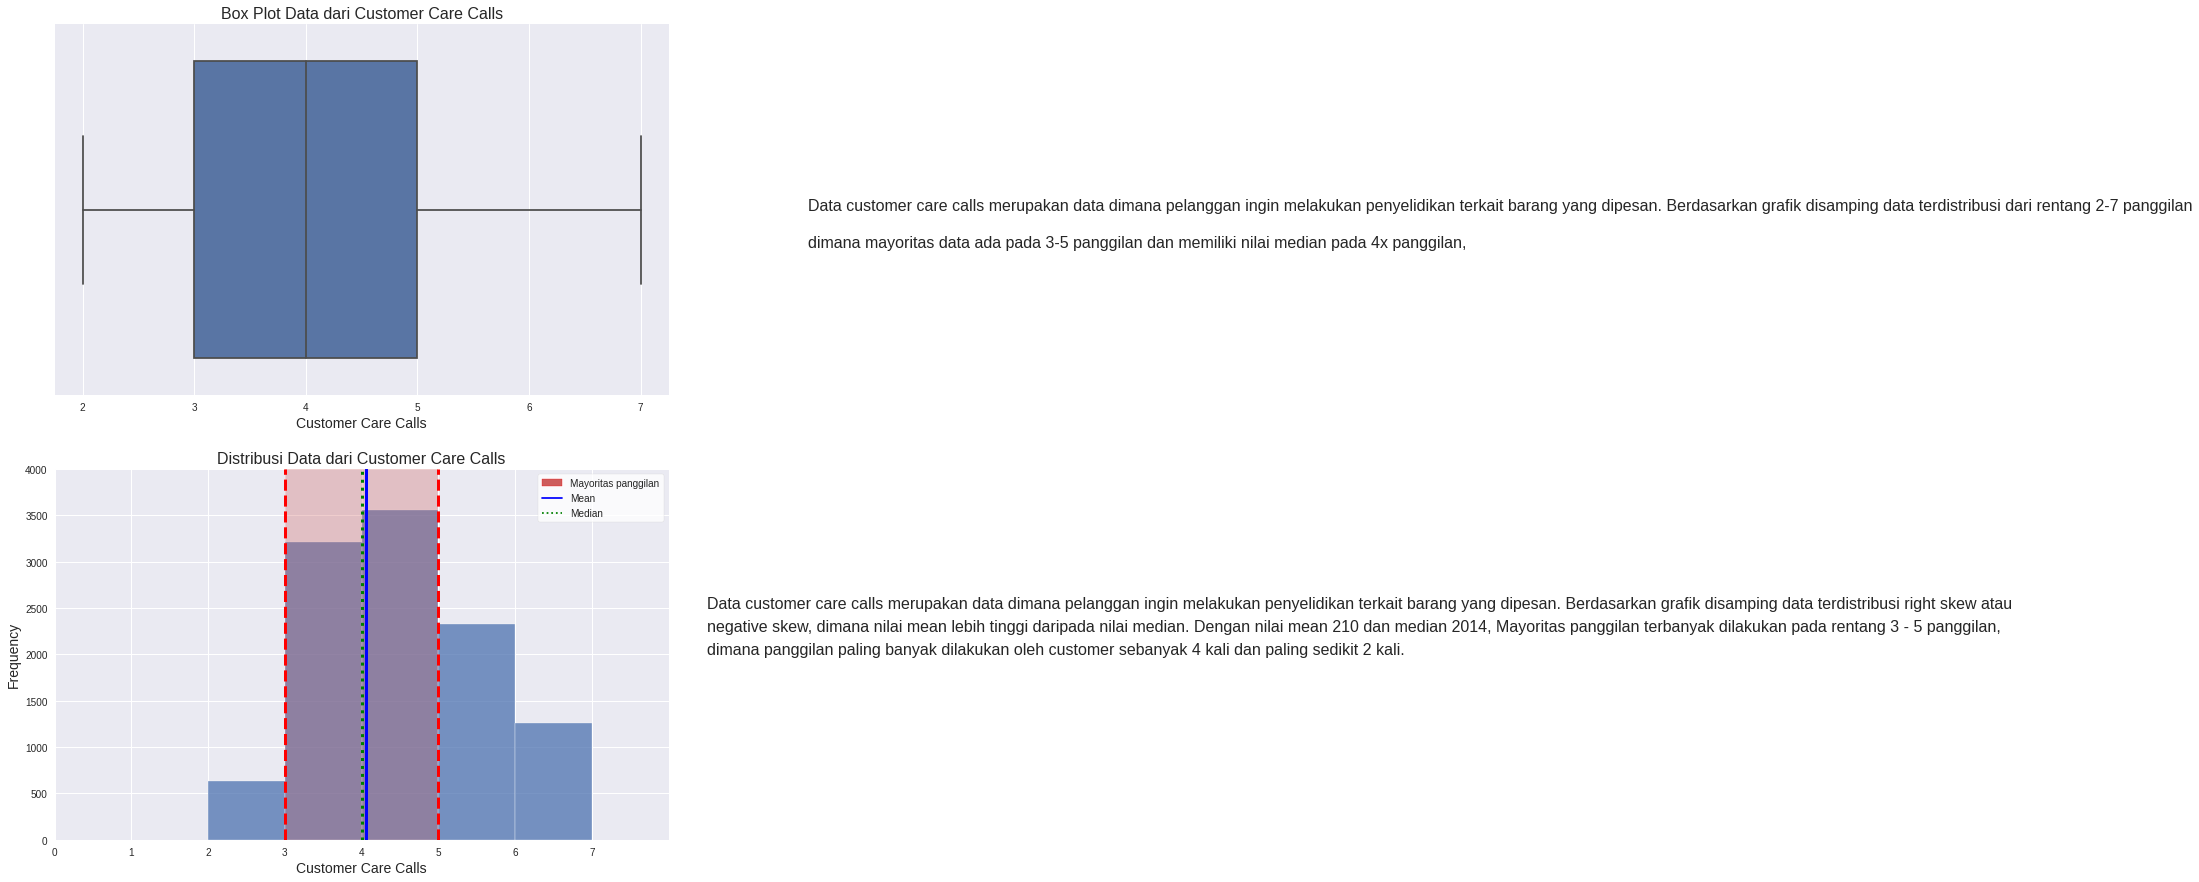

In [ ]:

fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Customer_care_calls')
ax[0].set_title('Box Plot Data dari Customer Care Calls', fontsize=16)
ax[0].set_xlabel('Customer Care Calls', fontsize=14)
ax[0].text(x=8.5,y=0, s='Data customer care calls merupakan data dimana pelanggan ingin melakukan penyelidikan terkait barang yang dipesan. Berdasarkan grafik disamping data terdistribusi dari rentang 2-7 panggilan' ,fontsize=16)
ax[0].text(x=8.5,y= 0.1,s='dimana mayoritas data ada pada 3-5 panggilan dan memiliki nilai median pada 4x panggilan, ' ,fontsize=16)



#nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']

sns.histplot(ax=ax[1],data=df, x='Customer_care_calls',binwidth=1)
ax[1].set_title('Distribusi Data dari Customer Care Calls', fontsize=16)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_xlabel('Customer Care Calls',fontsize=14)
ax[1].set_ylim(0,4000)
ax[1].set_xlim(1,8) 
ax[1].set_xticks(np.arange(0,8,1))
ax[1].stackplot(np.arange(3, 6,1), [[4000]], colors=('indianred',), alpha=0.3)
ax[1].axvline(x=3, color='red', linestyle='--', linewidth=3)
ax[1].axvline(x=5, color='red', linestyle='--', linewidth=3)
ax[1].axvline(x=np.mean(df['Customer_care_calls']), color='blue', linestyle='solid', linewidth=3)
ax[1].axvline(x=np.median(df['Customer_care_calls']), color='green', linestyle='dotted', linewidth=3)
ax[1].text(x=8.5,y=2500, s='Data customer care calls merupakan data dimana pelanggan ingin melakukan penyelidikan terkait barang yang dipesan. Berdasarkan grafik disamping data terdistribusi right skew atau ' ,fontsize=16)
ax[1].text(x=8.5,y= 2250,s='negative skew, dimana nilai mean lebih tinggi daripada nilai median. Dengan nilai mean 210 dan median 2014, Mayoritas panggilan terbanyak dilakukan pada rentang 3 - 5 panggilan, ' ,fontsize=16)
ax[1].text(x=8.5,y= 2000, s='dimana panggilan paling banyak dilakukan oleh customer sebanyak 4 kali dan paling sedikit 2 kali. ',fontsize=16)

legend_elements = [Patch(facecolor='indianred', edgecolor='r',
                         label='Mayoritas panggilan'),
                   Line2D([0], [0], ls='solid', color='blue', label='Mean',
                          markerfacecolor='g', markersize=15),
                   Line2D([0], [1], ls='dotted', color='green', label='Median',
                          markerfacecolor='g', markersize=15),]
ax[1].legend(handles=legend_elements, loc='upper right',frameon=True, facecolor='White')


plt.show()

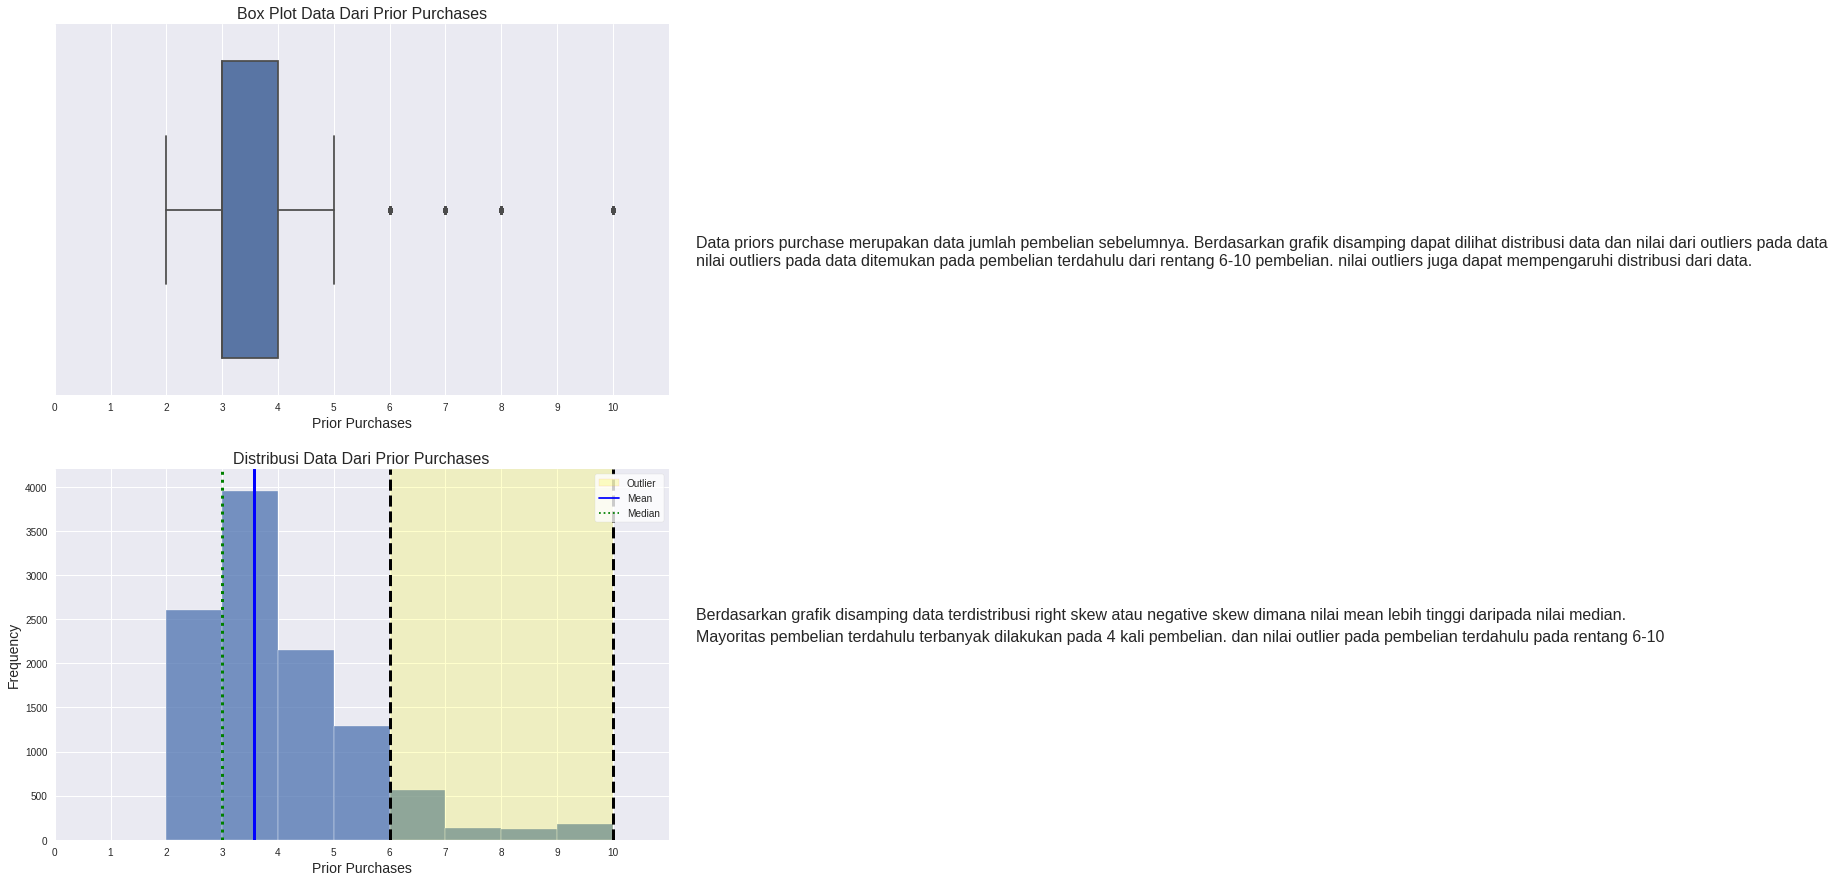

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Prior_purchases')
ax[0].set_title('Box Plot Data Dari Prior Purchases', fontsize=16)
ax[0].set_xlabel('Prior Purchases', fontsize=14)
ax[0].set_xlim(0,11)
ax[0].set_xticks(np.arange(0,11,1))
ax[0].text(x=11.5,y=0.1, s='Data priors purchase merupakan data jumlah pembelian sebelumnya. Berdasarkan grafik disamping dapat dilihat distribusi data dan nilai dari outliers pada data' ,fontsize=16)
ax[0].text(x=11.5,y= 0.15,s='nilai outliers pada data ditemukan pada pembelian terdahulu dari rentang 6-10 pembelian. nilai outliers juga dapat mempengaruhi distribusi dari data.' ,fontsize=16)



#nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']

sns.histplot(ax=ax[1],data=df, x='Prior_purchases',binwidth=1)
ax[1].set_title('Distribusi Data Dari Prior Purchases', fontsize=16)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_xlim(0,11)
ax[1].set_ylim(0,4200)
ticks = np.arange(0, 11,1)
ax[1].set_xticks(ticks)
ax[1].set_xlabel('Prior Purchases',fontsize=14)

ax[1].stackplot(np.arange(6, 11,1), [[4200]], colors=('yellow',), alpha=0.2)
ax[1].axvline(x=6, color='black', linestyle='--', linewidth=3)
ax[1].axvline(x=10, color='black', linestyle='--', linewidth=3)
ax[1].axvline(x=np.mean(df['Prior_purchases']), color='blue', linestyle='solid', linewidth=3)
ax[1].axvline(x=np.median(df['Prior_purchases']), color='green', linestyle='dotted', linewidth=3)
ax[1].text(x=11.5,y=2500, s='Berdasarkan grafik disamping data terdistribusi right skew atau negative skew dimana nilai mean lebih tinggi daripada nilai median.' ,fontsize=16)
ax[1].text(x=11.5,y= 2250,s='Mayoritas pembelian terdahulu terbanyak dilakukan pada 4 kali pembelian. dan nilai outlier pada pembelian terdahulu pada rentang 6-10' ,fontsize=16)


legend_elements = [Patch(facecolor='yellow', edgecolor='r',
                         label='Outlier',alpha=0.2),
                   Line2D([0], [0], ls='solid', color='blue', label='Mean',
                          markerfacecolor='g', markersize=15),
                   Line2D([0], [1], ls='dotted', color='green', label='Median',
                          markerfacecolor='g', markersize=15),]
ax[1].legend(handles=legend_elements, loc='upper right',frameon=True,facecolor='White')


plt.show()

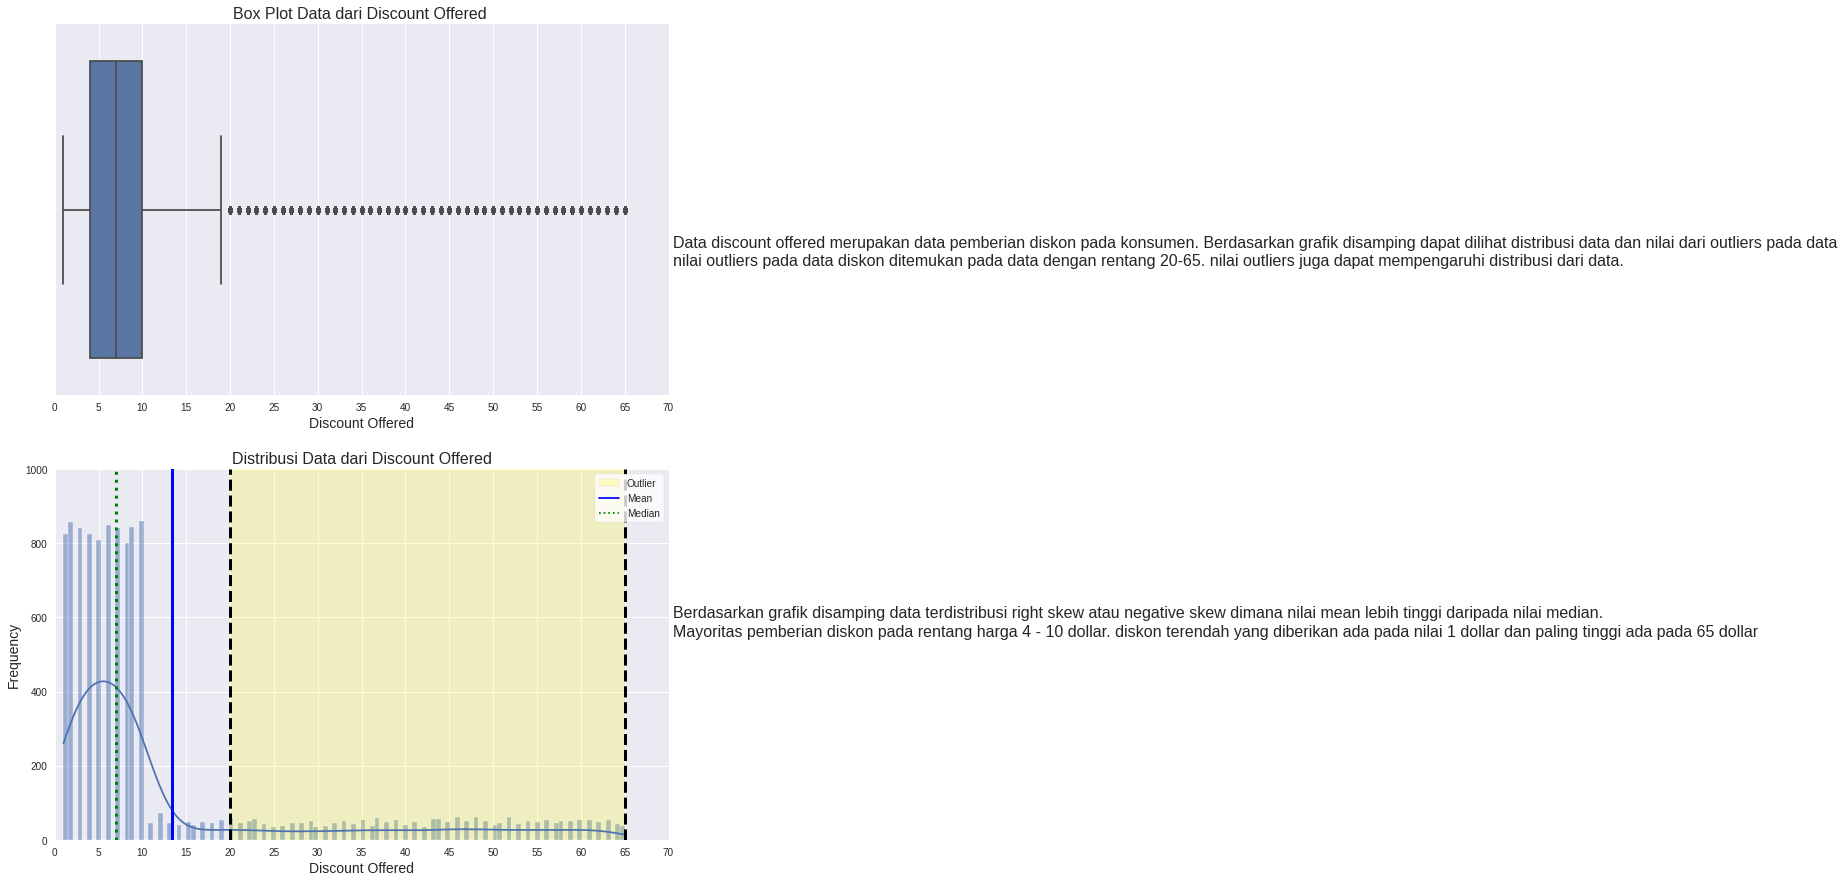

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Discount_offered')
ax[0].set_title('Box Plot Data dari Discount Offered ', fontsize=16)
ax[0].set_xlabel('Discount Offered', fontsize=14)
ax[0].set_xlim(0,70)
ax[0].set_xticks(np.arange(0,71,5))

ax[0].text(x=70.5,y=0.1, s='Data discount offered merupakan data pemberian diskon pada konsumen. Berdasarkan grafik disamping dapat dilihat distribusi data dan nilai dari outliers pada data' ,fontsize=16)
ax[0].text(x=70.5,y= 0.15,s='nilai outliers pada data diskon ditemukan pada data dengan rentang 20-65. nilai outliers juga dapat mempengaruhi distribusi dari data.' ,fontsize=16)




#nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']

sns.histplot(ax=ax[1],data=df['Discount_offered'],kde=True)
ax[1].set_title('Distribusi Data dari Discount Offered', fontsize=16)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_xlabel('Discount Offered',fontsize=14)
ax[1].set_xlim(0,70)
ax[1].set_ylim(0,1000)
ax[1].set_xticks(np.arange(0,71,5))

ax[1].stackplot(np.arange(20, 66,1), [[1000]], colors=('yellow',), alpha=0.2)
ax[1].axvline(x=20, color='black', linestyle='--', linewidth=3)
ax[1].axvline(x=65, color='black', linestyle='--', linewidth=3)
ax[1].text(x=70.5,y=600, s='Berdasarkan grafik disamping data terdistribusi right skew atau negative skew dimana nilai mean lebih tinggi daripada nilai median.' ,fontsize=16)
ax[1].text(x=70.5,y=550,s='Mayoritas pemberian diskon pada rentang harga 4 - 10 dollar. diskon terendah yang diberikan ada pada nilai 1 dollar dan paling tinggi ada pada 65 dollar ' ,fontsize=16)
ax[1].axvline(x=np.mean(df['Discount_offered']), color='blue', linestyle='solid', linewidth=3)
ax[1].axvline(x=np.median(df['Discount_offered']), color='green', linestyle='dotted', linewidth=3)

legend_elements = [Patch(facecolor='yellow', edgecolor='r',
                         label='Outlier',alpha=0.2),
                   Line2D([0], [0], ls='solid', color='blue', label='Mean',
                          markerfacecolor='g', markersize=15),
                   Line2D([0], [1], ls='dotted', color='green', label='Median',
                          markerfacecolor='g', markersize=15),]
ax[1].legend(handles=legend_elements, loc='upper right',frameon=True,facecolor='White')


plt.show()

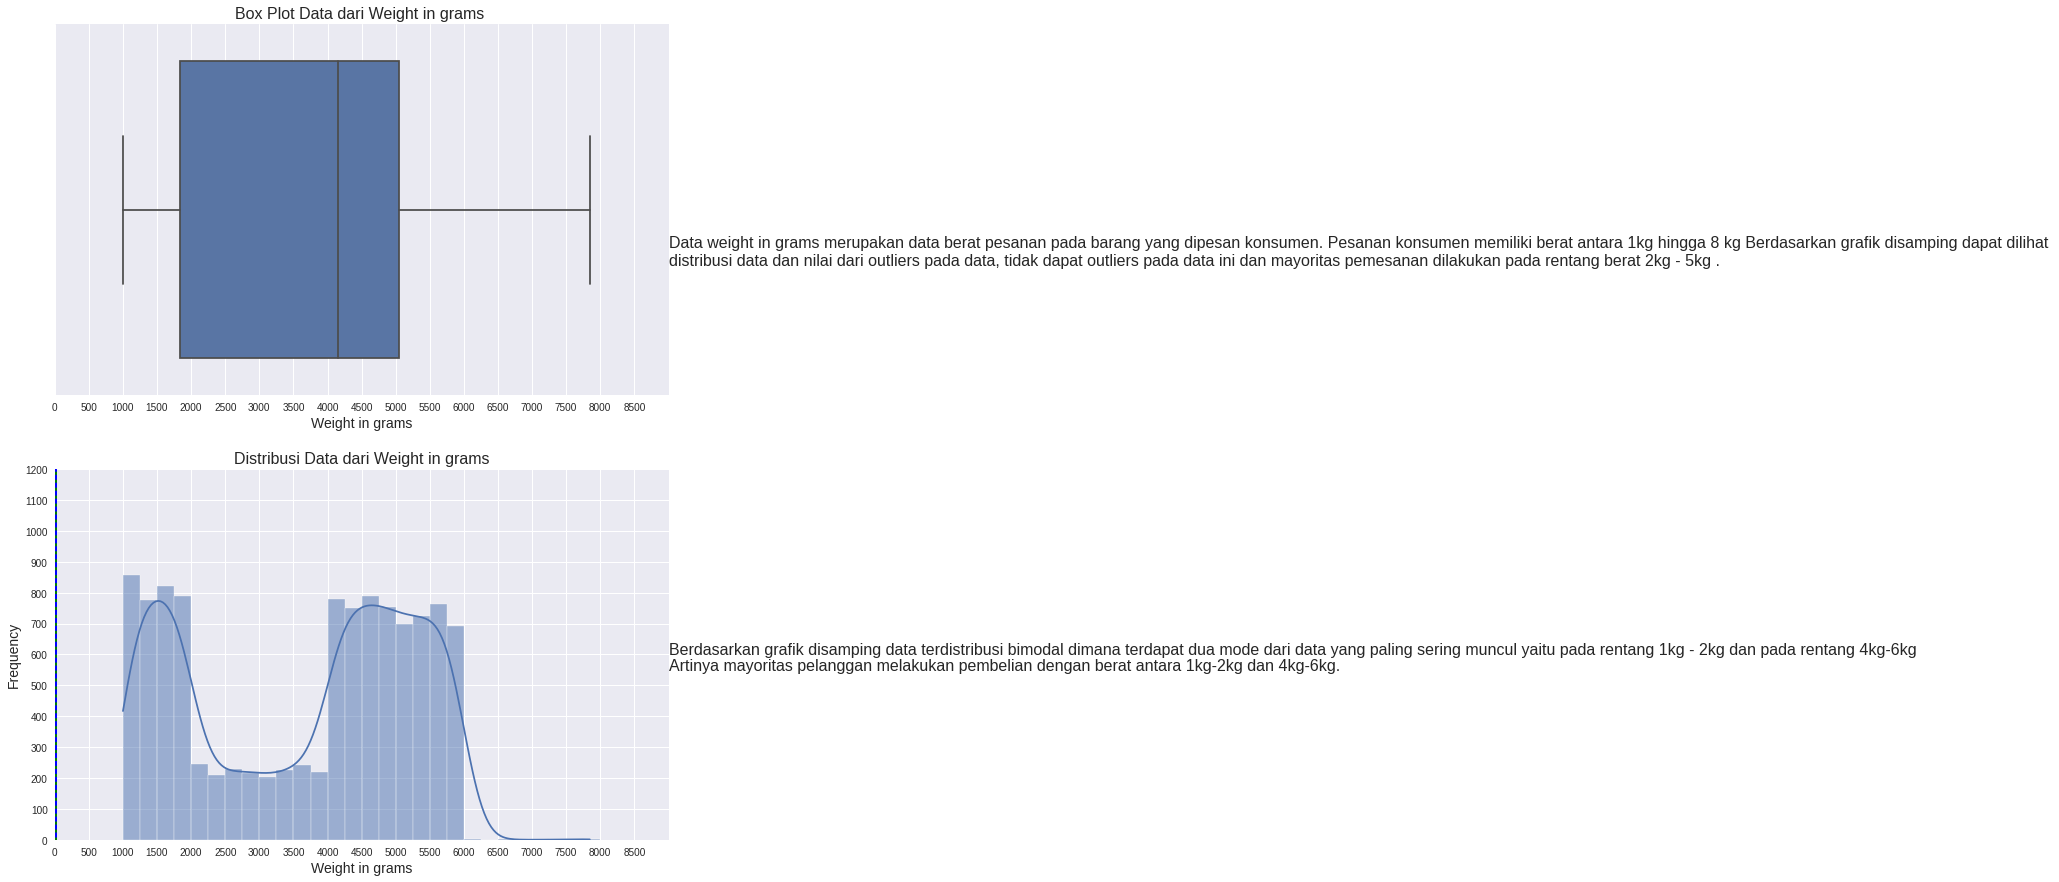

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Weight_in_gms')
ax[0].set_title('Box Plot Data dari Weight in grams ', fontsize=16)
ax[0].set_xlabel('Weight in grams', fontsize=14)
ax[0].text(x=9000.5,y=0.1, s='Data weight in grams merupakan data berat pesanan pada barang yang dipesan konsumen. Pesanan konsumen memiliki berat antara 1kg hingga 8 kg Berdasarkan grafik disamping dapat dilihat ' ,fontsize=16)
ax[0].text(x=9000.5,y= 0.15,s='distribusi data dan nilai dari outliers pada data, tidak dapat outliers pada data ini dan mayoritas pemesanan dilakukan pada rentang berat 2kg - 5kg .' ,fontsize=16)
ax[0].set_xlim(0,9000)
ax[0].set_xticks(np.arange(0,9000,500))



#nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']

sns.histplot(ax=ax[1],data=df['Weight_in_gms'],binwidth=250,kde=True)
ax[1].set_title('Distribusi Data dari Weight in grams', fontsize=16)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_xlabel('Weight in grams',fontsize=14)
ax[1].set_xlim(0,9000)
ax[1].set_xticks(np.arange(0,9000,500))
ax[1].set_ylim(0,1200)
ax[1].set_yticks(np.arange(0,1300,100))


#ax[1].stackplot(np.arange(20, 66,1), [[1000]], colors=('yellow',), alpha=0.2)
#ax[1].axvline(x=20, color='black', linestyle='--', linewidth=3)
#ax[1].axvline(x=65, color='black', linestyle='--', linewidth=3)
ax[1].text(x=9000.5,y=600, s='Berdasarkan grafik disamping data terdistribusi bimodal dimana terdapat dua mode dari data yang paling sering muncul yaitu pada rentang 1kg - 2kg dan pada rentang 4kg-6kg' ,fontsize=16)
ax[1].text(x=9000.5,y=550,s='Artinya mayoritas pelanggan melakukan pembelian dengan berat antara 1kg-2kg dan 4kg-6kg.' ,fontsize=16)
ax[1].axvline(x=np.mean(df['Prior_purchases']), color='blue', linestyle='solid', linewidth=3)
ax[1].axvline(x=np.median(df['Prior_purchases']), color='green', linestyle='dotted', linewidth=3)



plt.show()

# Multivariate Analysis

<AxesSubplot: >

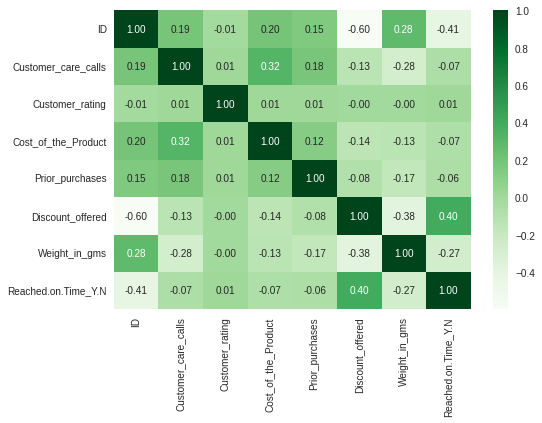

In [ ]:
sns.heatmap(df.corr('pearson'), cmap='Greens', annot=True, fmt='.2f')

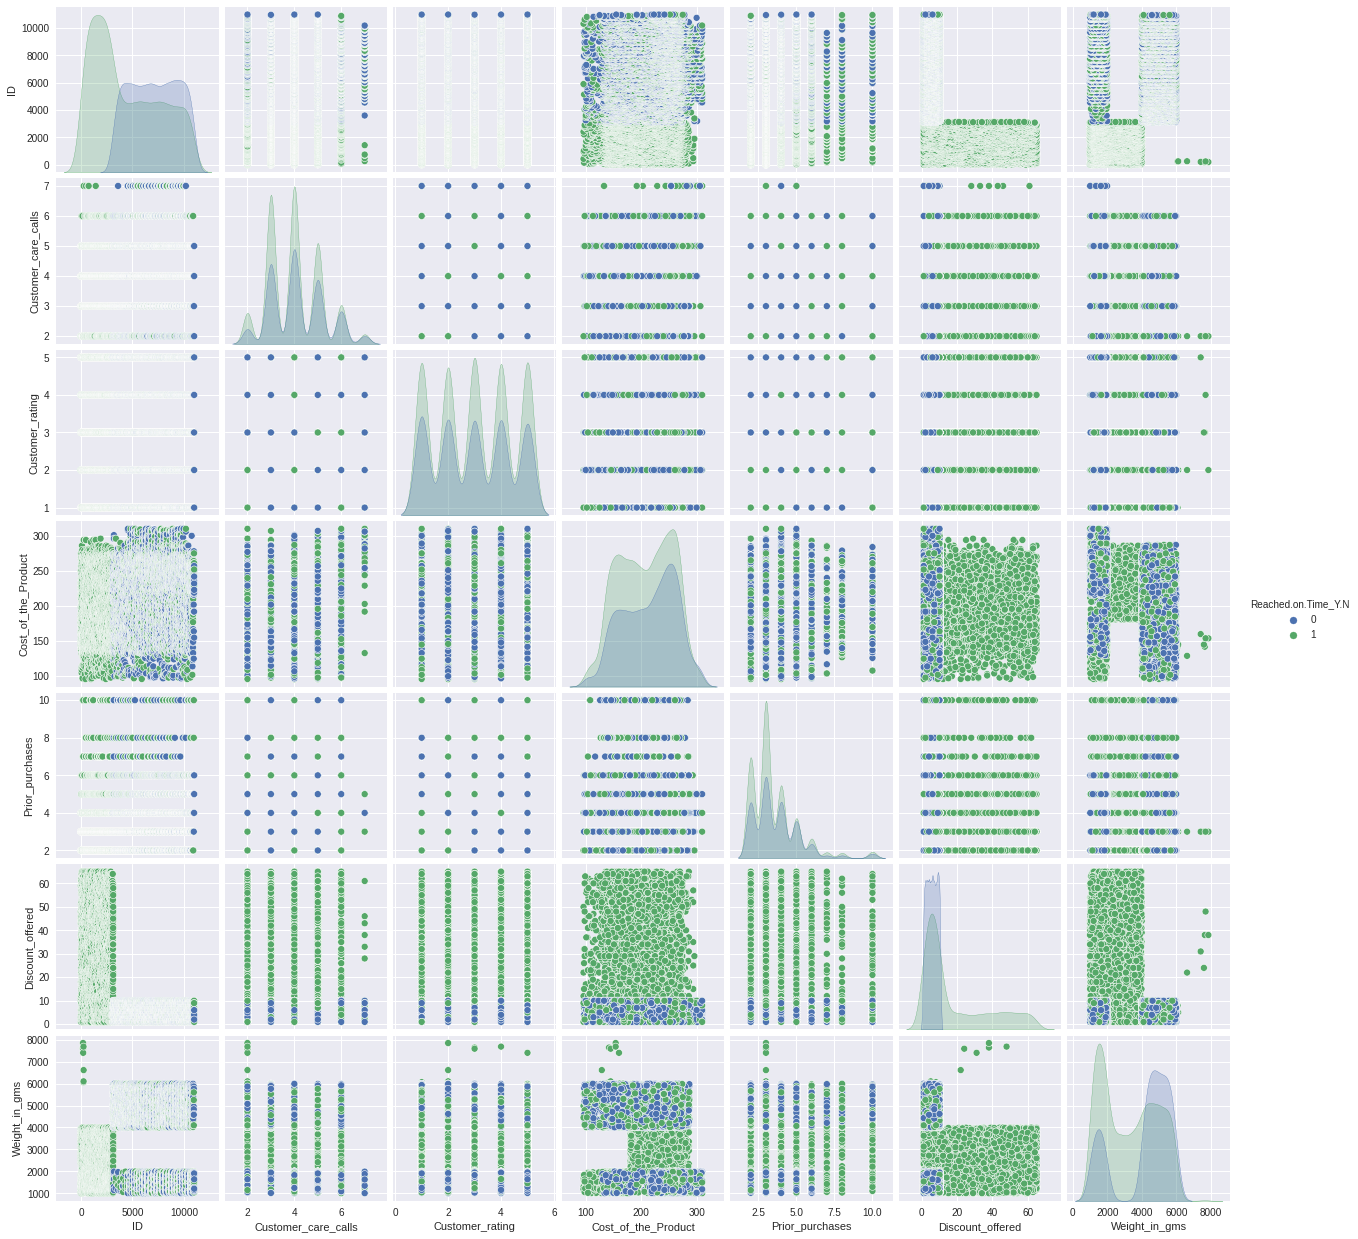

In [ ]:
sns.pairplot(df,diag_kind='kde', hue='Reached.on.Time_Y.N')

#Business Insight

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan
rekomendasinya untuk bisnis. <br>

1. korelasi discont offer terhadap time<br>
2. korelasi  weight in gms dengan discont<br>
3. ID customer dibawah 4rb tidak ada yang reach on time<br>
4. Weight Diatas 2000 gr sampai 4000gr tidak ada yang reach on time<br>
5. Diskon diatas 10rb tidak ada yang reach on time<br>

Bisnis insight<br>

1. berdasarkan insight tersebut,untuk pengkiriman supaya tepat waktu kita dapat mengurangi diskon terhadap barang barang tertentu , sehingga tidak terjadi penumpukan barang pengkiriman <br>

2. kita tetap memberika diskon pada barang yang lebih berat karena dapat meniingkatkan penilaian customer di e-commerce  kita

3. Kemungkinan ada Error pada ID customer pada aplikasi sehingga perlu menyarankan perbaikan error

4. Berat barang 2000gr sampai 4000gr perlu diperhatikan cara pengiriman yang tepat

5. Diskon perlu dikurangi agar pengirimin lancar


